### mini project 2 

Ariel Tzooman 211778410

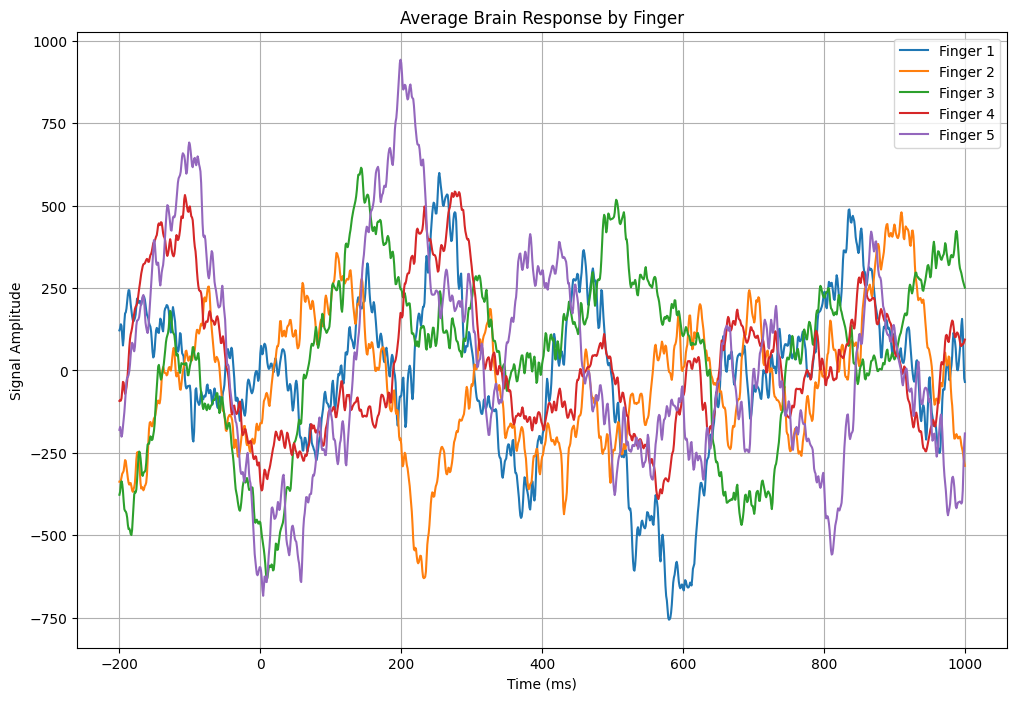


The 5x1201 matrix:
[[ 121.585938  128.078125  140.179688 ...   42.8125    -23.765625
   -34.859375]
 [-337.725    -338.283333 -334.625    ... -263.216667 -278.083333
  -289.5     ]
 [-377.333333 -367.991667 -346.641667 ...  265.883333  258.375
   251.183333]
 [ -92.447368  -89.542105  -91.615789 ...   81.105263   87.2
    93.636842]
 [-180.351351 -171.594595 -185.486486 ... -294.054054 -222.864865
  -191.216216]]

The matrix as Data Frame:

         0           1           2           3           4           5     \
0  121.585938  128.078125  140.179688  135.187500  101.851562   75.820312   
1 -337.725000 -338.283333 -334.625000 -323.558333 -313.175000 -309.916667   
2 -377.333333 -367.991667 -346.641667 -336.325000 -344.958333 -365.325000   
3  -92.447368  -89.542105  -91.615789  -84.073684  -58.947368  -34.610526   
4 -180.351351 -171.594595 -185.486486 -201.135135 -192.472973 -170.932432   

         6           7           8           9           10          11    \
0   97.250000 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calc_mean_erp(trial_points, ecog_data):
    # Import trial points data with specific formatting
    trials_df = pd.read_csv(trial_points, header=None, dtype=np.float64)
    # Convert to int after loading as float (since the values are large)
    trials_df = trials_df.astype(int)
    
    # Import brain data - scientific notation format
    ecog_signal = pd.read_csv(ecog_data, header=None, dtype=np.float64)
    ecog_signal = ecog_signal.iloc[:, 0].to_numpy()  # Take first column
    
    # Initialize output matrix (5 fingers × 1201 timepoints)
    fingers_erp_mean = np.zeros((5, 1201))
    
    # Process each finger (1-5)
    for finger in range(1, 6):
        # Get all trials for current finger
        finger_trials = trials_df[trials_df.iloc[:, 2] == finger]  # Third column contains finger number
        start_points = finger_trials.iloc[:, 0]  # First column contains start points
        
        # Initialize array to store all trials for current finger
        all_trials = np.zeros((len(start_points), 1201))
        valid_trial_count = 0
        
        # Extract signal for each trial
        for i, start in enumerate(start_points):
            # Define time window (-200 to +1000 ms)
            window_start = start - 200
            window_end = start + 1001
            
            # Extract signal for this trial if within valid range
            if window_start >= 0 and window_end <= len(ecog_signal):
                all_trials[valid_trial_count, :] = ecog_signal[window_start:window_end]
                valid_trial_count += 1
        
        # Trim array to only include valid trials
        all_trials = all_trials[:valid_trial_count, :]
        
        # Calculate mean across all valid trials for this finger
        if valid_trial_count > 0:
            fingers_erp_mean[finger-1, :] = np.mean(all_trials, axis=0)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    time_axis = np.arange(-200, 1001)
    for finger in range(5):
        plt.plot(time_axis, fingers_erp_mean[finger, :], 
                label=f'Finger {finger+1}')
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal Amplitude')
    plt.title('Average Brain Response by Finger')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display the matrix in numpy format
    print("\nThe 5x1201 matrix:")
    np.set_printoptions(precision=6, suppress=True, threshold=5)
    print(fingers_erp_mean)
    
    # Convert to DataFrame and display
    print("\nThe matrix as Data Frame:\n")
    df = pd.DataFrame(fingers_erp_mean)
    
    # Format all numbers to 6 decimal places
    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    # Display the formatted DataFrame
    print(df)
    
    return fingers_erp_mean

# Example usage (run in separate cell):
fingers_erp_mean = calc_mean_erp('events_file_ordered.csv', 'brain_data_channel_one.csv')

# Optional: Save the results
# Save the matrix to CSV
df = pd.DataFrame(fingers_erp_mean)
df.to_csv('formatted_output.csv', float_format='%.6f', index=False)

# Save the plot if needed
# plt.savefig('brain_response_plot.png', dpi=300, bbox_inches='tight')